In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
house= pd.read_excel('innercity.xlsx')

In [3]:
house.head(25).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
cid,3876100940,3145600250,7129303070,7338220280,7950300670,8016250080,510002519,1624059224,5469503280,2787460430,...,3131201320,2878601425,3832300090,7882600332,7010700660,8682320640,7227800055,2902200915,9477200200,7714000310
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000,20140709T000000,20140715T000000,20140618T000000,20140721T000000,20141028T000000,...,20140822T000000,20140522T000000,20140709T000000,20140819T000000,20150428T000000,20150212T000000,20140909T000000,20141125T000000,20140818T000000,20140719T000000
price,600000,190000,735000,257000,450000,245000,466000,1160000,449950,299950,...,733000,600000,215000,968060,807000,695000,199500,675000,305000,374950
room_bed,4.0,2.0,4.0,3.0,2.0,3.0,2.0,4.0,4.0,2.0,...,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,3.0,4.0
room_bath,1.75,1.0,2.75,2.5,1.0,2.5,1.5,3.5,2.5,1.75,...,1.75,1.75,1.0,2.5,2.5,2.5,2.0,1.75,1.75,2.5
living_measure,3050.0,670.0,3040.0,1740.0,1120.0,1610.0,1140.0,4680.0,3100.0,1460.0,...,1930.0,1650.0,1200.0,2620.0,1940.0,2170.0,1750.0,2130.0,1650.0,2790.0
lot_measure,9440.0,3101.0,2415.0,3721.0,4590.0,7223.0,1058.0,9700.0,10000.0,10506.0,...,3876.0,5100.0,7280.0,16200.0,4000.0,7665.0,8116.0,4400.0,9480.0,4650.0
ceil,1,1,2,2,1,2,3,2,2,1,...,1.5,1,1,1,2,1,1,1,1,2
coast,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sight,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0


In [4]:
house["coast"] = house["coast"].astype('object')
house["sight"] = house["sight"].astype('object')
house["condition"] = house["condition"].astype('object')
house["quality"] = house["quality"].astype('object')
house["furnished"] = house["furnished"].astype('object')

In [5]:
house['total_area'] = house['total_area'].replace('$',0)

In [6]:
house['ceil'] = house['ceil'].replace('$',0)

In [7]:
house['condition'] = house['condition'].replace('$',0)

In [8]:
house['yr_built'] = house['yr_built'].replace('$',0)

In [9]:
house['coast'] = house['coast'].replace('$',0)

In [10]:
house['long'] = house['long'].replace('$',0)

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  float64
 8   coast             21612 non-null  float64
 9   sight             21556 non-null  object 
 10  condition         21556 non-null  float64
 11  quality           21612 non-null  object 
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [12]:
house.drop(['dayhours'], axis=1, inplace=True)

In [13]:
num_column= ['cid','price','living_measure', 'lot_measure', 'ceil_measure', 'basement','zipcode', 'lat', 'living_measure15', 'lot_measure15','total_area' ]




In [14]:
house.describe().T


,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21505.0,3.371355e+00,9.302886e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21505.0,2.115171e+00,7.702481e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21596.0,2.079861e+03,9.184961e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21571.0,1.510458e+04,4.142362e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068450e+04,1.651359e+06
ceil,21571.0,1.492050e+00,5.424017e-01,0.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21612.0,7.449565e-03,8.599076e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
condition,21556.0,3.404899e+00,6.617790e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
ceil_measure,21612.0,1.788367e+03,8.281025e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03


In [15]:
house.columns

Index(['cid', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [16]:
house.corr()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,condition,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,total_area
cid,1.000000,-0.016797,0.001774,0.005660,-0.012130,-0.132043,0.019094,-0.004187,-0.023936,-0.010821,-0.005174,0.004932,-0.016907,-0.008224,-0.001891,0.000170,-0.002860,-0.138750,-0.131740
price,-0.016797,1.000000,0.308040,0.525179,0.702149,0.089733,0.255111,0.266041,0.035709,0.605593,0.323825,0.033766,0.126442,-0.053168,0.306919,0.020076,0.585186,0.082603,0.104850
room_bed,0.001774,0.308040,1.000000,0.515778,0.576447,0.032051,0.173724,-0.006258,0.027766,0.477708,0.302569,0.154353,0.018843,-0.152805,-0.009125,0.018069,0.390823,0.029484,0.044588
room_bath,0.005660,0.525179,0.515778,1.000000,0.754617,0.088055,0.496037,0.062129,-0.126339,0.685556,0.283389,0.506339,0.050194,-0.204149,0.024505,0.021396,0.568001,0.087096,0.104239
living_measure,-0.012130,0.702149,0.576447,0.754617,1.000000,0.172958,0.351458,0.102532,-0.056563,0.876653,0.435035,0.172216,0.055253,-0.199646,0.052764,0.015228,0.756188,0.183548,0.194267
lot_measure,-0.132043,0.089733,0.032051,0.088055,0.172958,1.000000,-0.006453,0.021301,-0.007700,0.183656,0.015400,0.030527,0.007782,-0.129423,-0.086142,0.003020,0.145653,0.717727,0.999623
ceil,0.019094,0.255111,0.173724,0.496037,0.351458,-0.006453,1.000000,0.024676,-0.256758,0.520588,-0.244514,0.253500,0.005501,-0.058220,0.049805,-0.006579,0.277223,-0.011694,0.001644
coast,-0.004187,0.266041,-0.006258,0.062129,0.102532,0.021301,0.024676,1.000000,0.017759,0.071329,0.079237,-0.011157,0.088357,0.030286,-0.014144,-0.004659,0.086096,0.030706,0.023294
condition,-0.023936,0.035709,0.027766,-0.126339,-0.056563,-0.007700,-0.256758,0.017759,1.000000,-0.155043,0.172440,-0.177956,-0.059421,0.002917,-0.015402,0.002649,-0.094103,-0.002005,-0.009001
ceil_measure,-0.010821,0.605593,0.477708,0.685556,0.876653,0.183656,0.520588,0.071329,-0.155043,1.000000,-0.051925,0.225533,0.023291,-0.261171,-0.000784,0.013680,0.731558,0.194246,0.202151


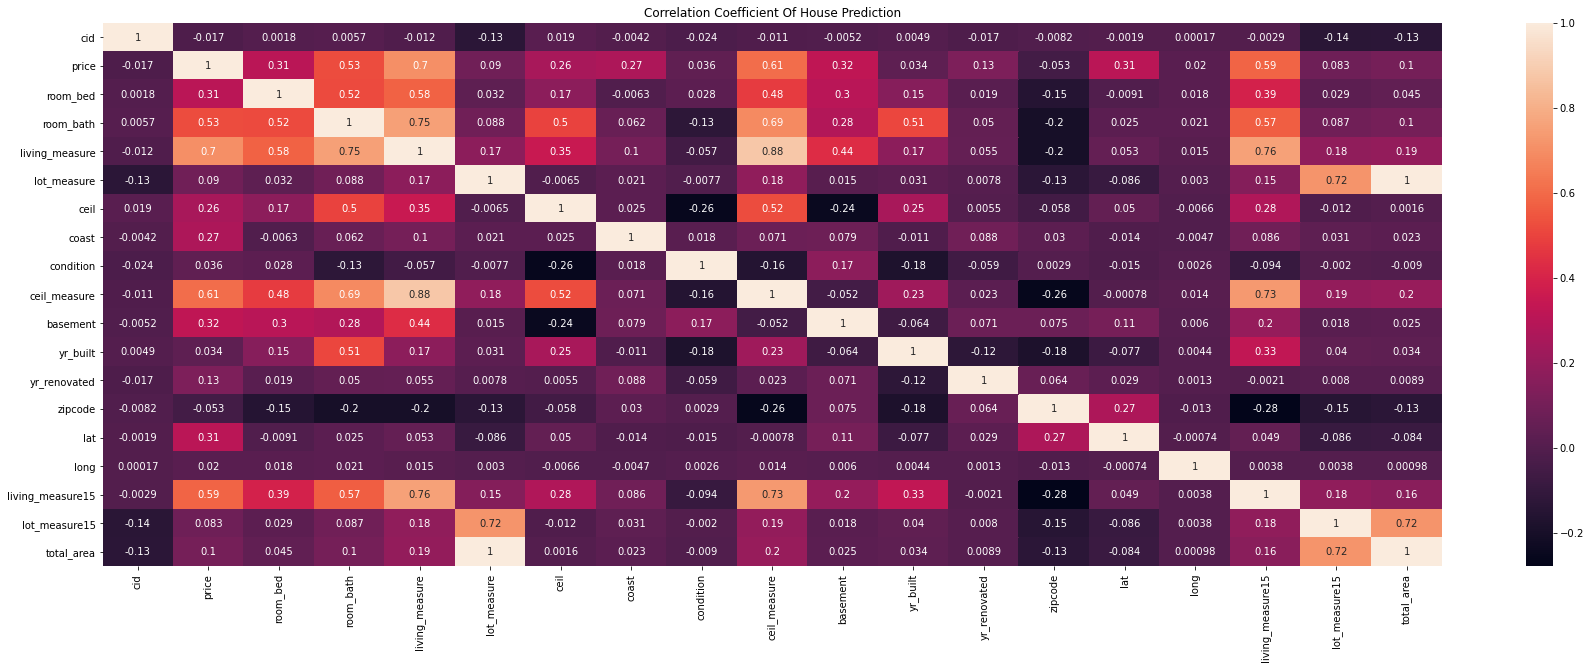

In [17]:
plt.figure(figsize=(30,10))
sns.heatmap(house.corr(), annot=True)
plt.title('Correlation Coefficient Of House Prediction')
plt.show()

In [18]:
house.isnull().sum()

cid                   0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [19]:
house.isnull().sum().sort_values(ascending=False)/house.index.size

living_measure15    0.007681
room_bed            0.004997
room_bath           0.004997
sight               0.002637
condition           0.002637
lot_measure         0.001943
ceil                0.001943
total_area          0.001342
furnished           0.001342
lot_measure15       0.001342
living_measure      0.000787
yr_built            0.000046
ceil_measure        0.000046
basement            0.000046
quality             0.000046
coast               0.000046
yr_renovated        0.000000
zipcode             0.000000
lat                 0.000000
long                0.000000
price               0.000000
cid                 0.000000
dtype: float64

In [20]:
from numpy import nan

In [21]:
house.replace(0, nan)

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,600000,4.0,1.75,3050.0,9440.0,1.0,NaN,NaN,3.0,...,1250.0,1966.0,NaN,98034,47.7228,-122.183,2020.0,8660.0,NaN,12490.0
1,3145600250,190000,2.0,1.00,670.0,3101.0,1.0,NaN,NaN,4.0,...,NaN,1948.0,NaN,98118,47.5546,-122.274,1660.0,4100.0,NaN,3771.0
2,7129303070,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,...,NaN,1966.0,NaN,98118,47.5188,-122.256,2620.0,2433.0,NaN,5455.0
3,7338220280,257000,3.0,2.50,1740.0,3721.0,2.0,NaN,NaN,3.0,...,NaN,2009.0,NaN,98002,47.3363,-122.213,2030.0,3794.0,NaN,5461.0
4,7950300670,450000,2.0,1.00,1120.0,4590.0,1.0,NaN,NaN,3.0,...,NaN,1924.0,NaN,98118,47.5663,-122.285,1120.0,5100.0,NaN,5710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,203600600,685530,4.0,2.50,3130.0,60467.0,2.0,NaN,NaN,3.0,...,NaN,1996.0,NaN,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597.0
21609,625049281,535000,2.0,1.00,1030.0,4841.0,1.0,NaN,NaN,3.0,...,110.0,1939.0,NaN,98103,47.6860,-122.341,1530.0,4944.0,NaN,5871.0
21610,424069018,998000,3.0,3.75,3710.0,34412.0,2.0,NaN,NaN,3.0,...,800.0,1978.0,NaN,98075,47.5888,-122.040,2390.0,34412.0,1.0,38122.0
21611,7258200055,262000,4.0,2.50,1560.0,7800.0,2.0,NaN,NaN,3.0,...,NaN,1997.0,NaN,98168,47.5140,-122.316,1160.0,7800.0,NaN,9360.0


In [22]:
house.fillna(house.mean(), inplace=True)
print(house.isnull().sum())


cid                 0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64


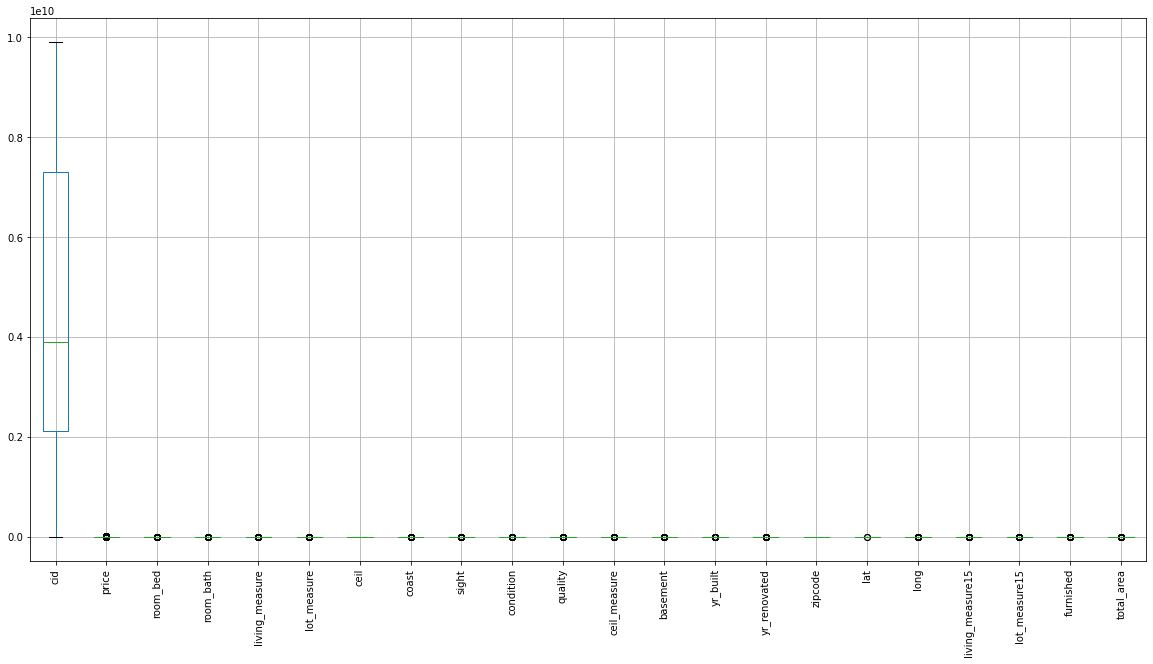

In [23]:
house.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

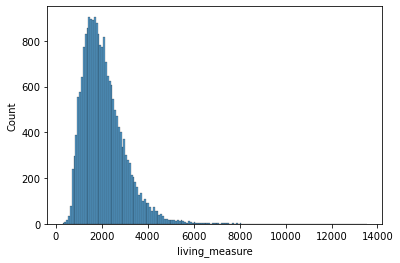

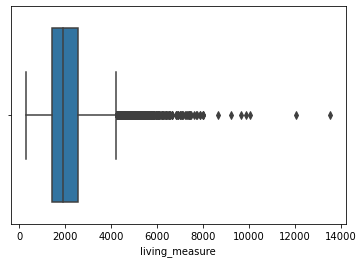

In [24]:
plt.figure()
ax=sns.histplot(x=house['living_measure'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['living_measure'])
plt.show()

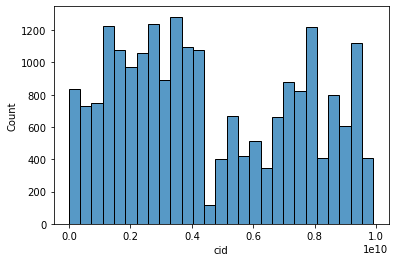

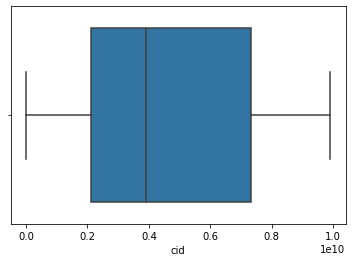

In [25]:
plt.figure()
ax=sns.histplot(x=house['cid'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['cid'])
plt.show()

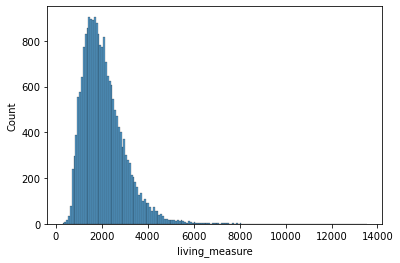

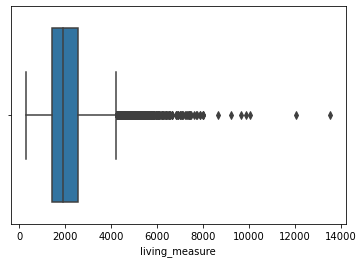

In [26]:
plt.figure()
ax=sns.histplot(x=house['living_measure'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['living_measure'])
plt.show()

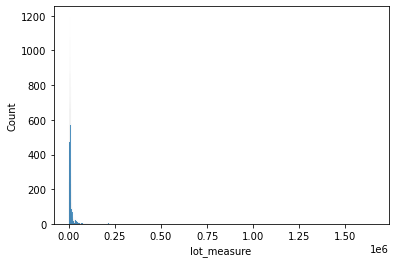

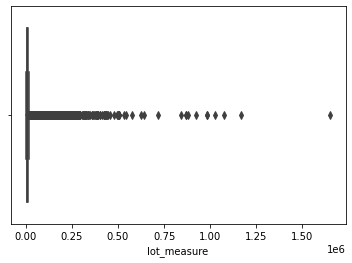

In [27]:
plt.figure()
ax=sns.histplot(x=house['lot_measure'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['lot_measure'])
plt.show()

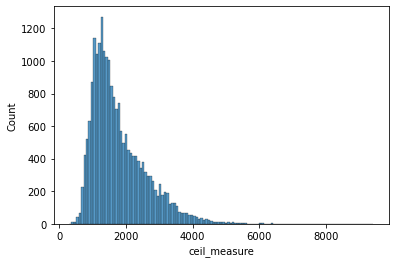

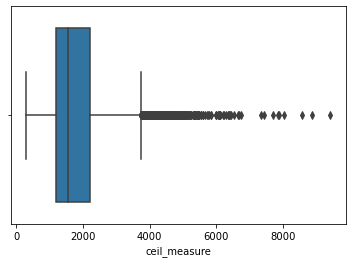

In [28]:
plt.figure()
ax=sns.histplot(x=house['ceil_measure'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['ceil_measure'])
plt.show()

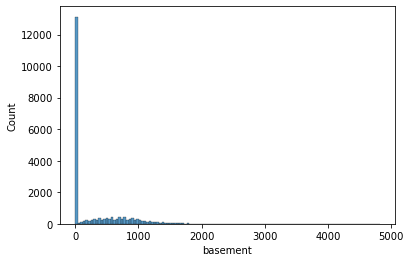

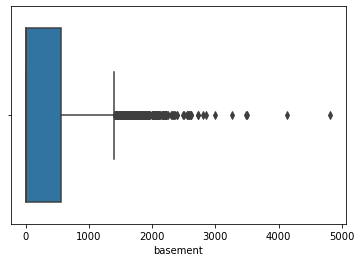

In [29]:
plt.figure()
ax=sns.histplot(x=house['basement'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['basement'])
plt.show()

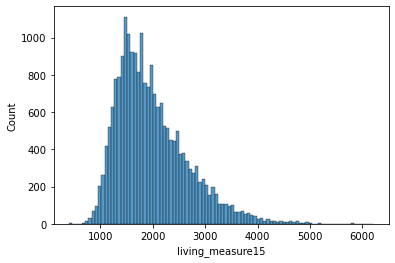

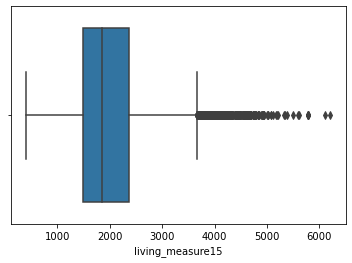

In [30]:
plt.figure()
ax=sns.histplot(x=house['living_measure15'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['living_measure15'])
plt.show()

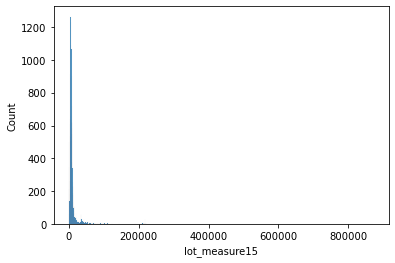

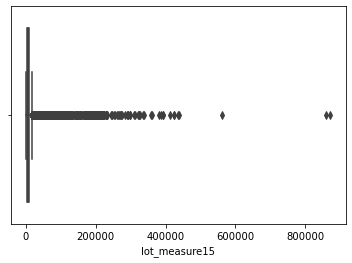

In [31]:
plt.figure()
ax=sns.histplot(x=house['lot_measure15'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['lot_measure15'])
plt.show()

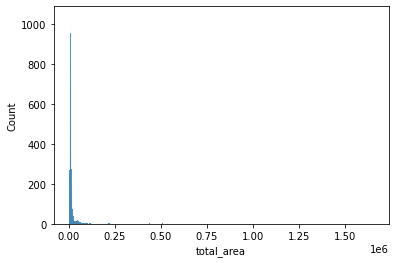

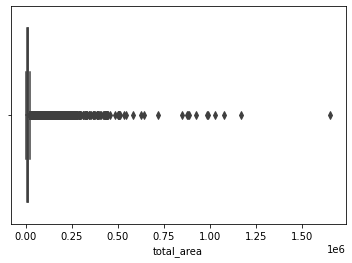

In [32]:
plt.figure()
ax=sns.histplot(x=house['total_area'])
plt.show()
    
plt.figure()
ax=sns.boxplot(x=house['total_area'])
plt.show()

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
housep = house.select_dtypes(include = ['float64', 'int64'])
for column in housep.columns: 
    lr,ur=remove_outlier(house[column])
    house[column]=np.where(house[column]>ur,ur,house[column])
    house[column]=np.where(house[column]<lr,lr,house[column])

In [35]:
def univariateAnalysis(column, nbins):    
    
    plt.figure()
    ax=sns.boxplot(x=house[column])
    plt.show()

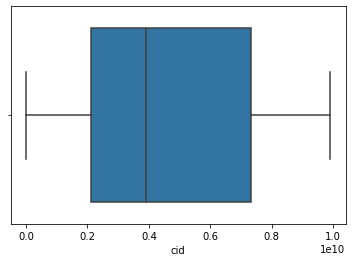

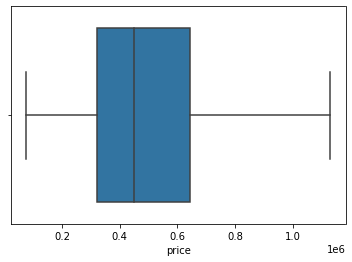

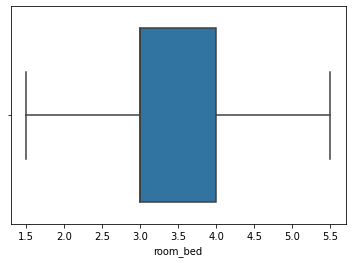

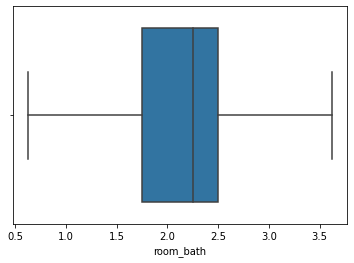

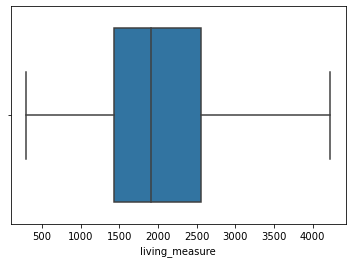

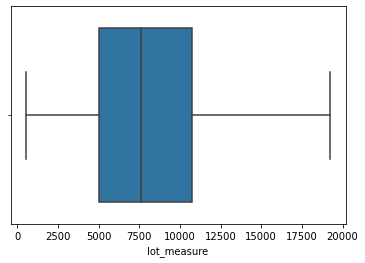

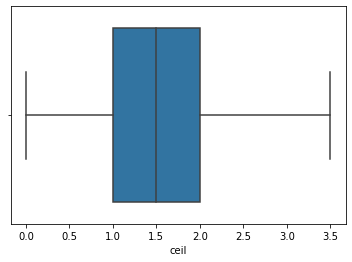

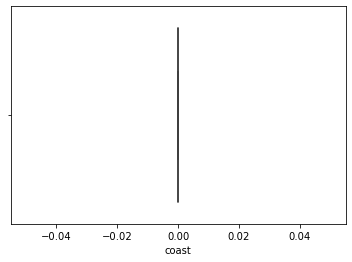

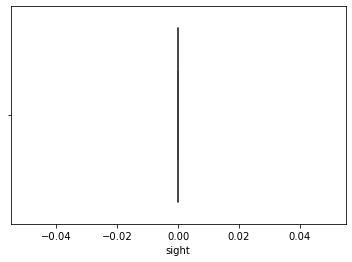

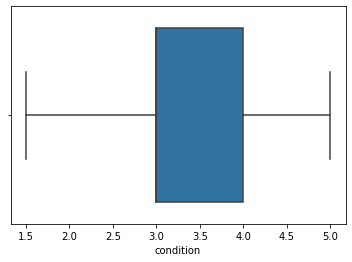

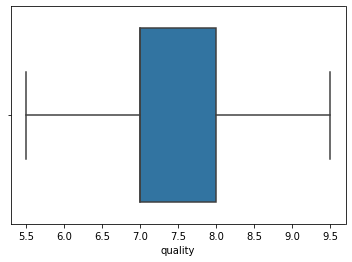

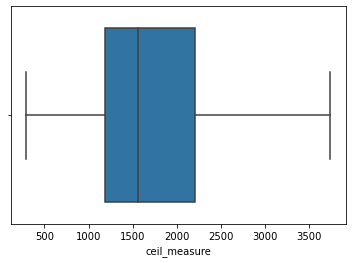

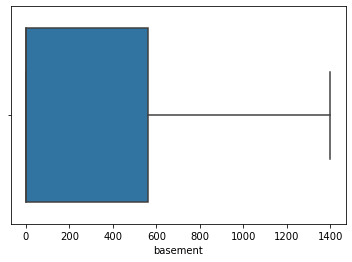

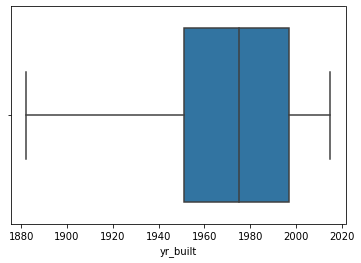

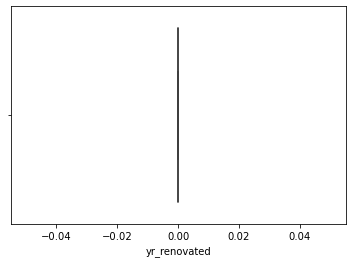

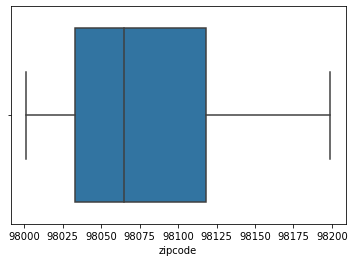

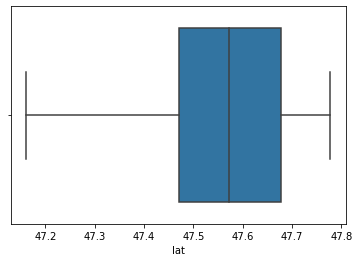

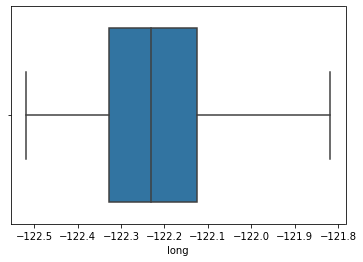

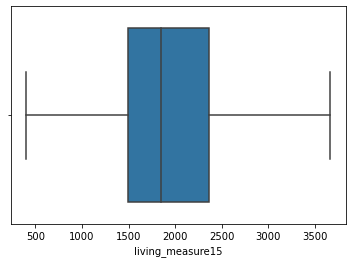

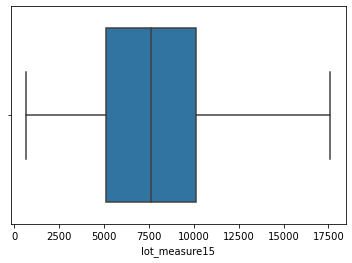

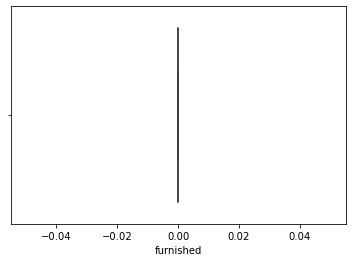

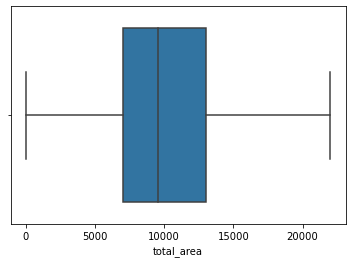

In [36]:
housep = house.select_dtypes(include = ['float64', 'int64','int16'])
housep_col = list(housep.columns.values)
len(housep_col)

for x in housep_col:
    univariateAnalysis(x, 20)

<AxesSubplot:xlabel='room_bed', ylabel='price'>

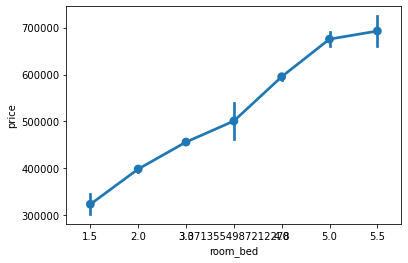

In [37]:
sns.pointplot(x='room_bed',y='price',data=house)

<AxesSubplot:xlabel='room_bath', ylabel='price'>

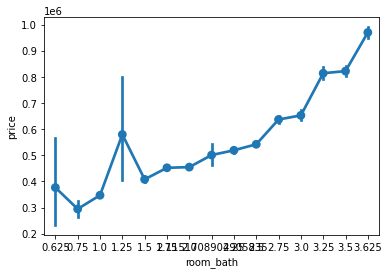

In [38]:
sns.pointplot(x='room_bath',y='price',data=house)

<AxesSubplot:xlabel='living_measure', ylabel='price'>

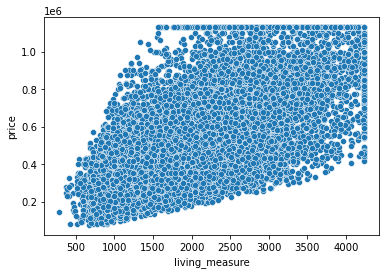

In [39]:
sns.scatterplot(x='living_measure', y='price', data=house)

<AxesSubplot:xlabel='lot_measure', ylabel='price'>

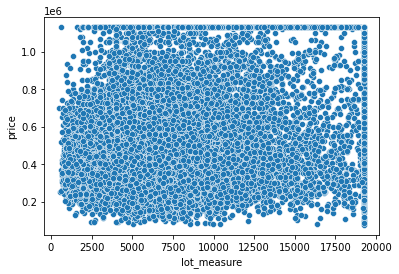

In [40]:
sns.scatterplot(x='lot_measure', y='price', data=house)

<AxesSubplot:xlabel='ceil', ylabel='price'>

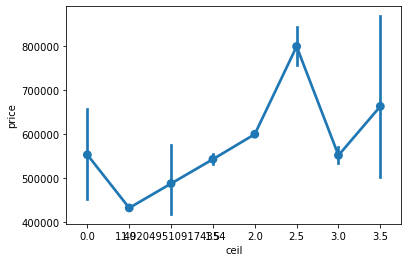

In [41]:
sns.pointplot(x='ceil',y='price',data=house)

<AxesSubplot:xlabel='coast', ylabel='price'>

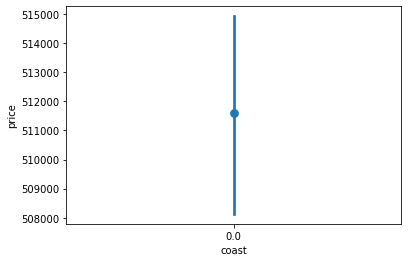

In [42]:
sns.pointplot(x='coast',y='price',data=house)

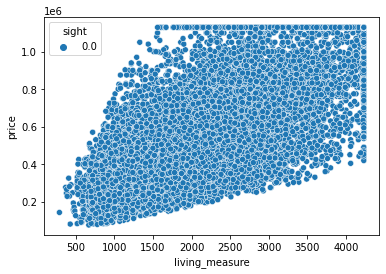

In [43]:
plt.figure()
sns.scatterplot(x='living_measure', y='price',hue='sight', data=house)
plt.show()

<AxesSubplot:xlabel='condition', ylabel='price'>

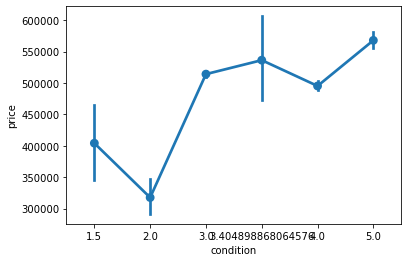

In [44]:
sns.pointplot(x='condition',y='price',data=house)

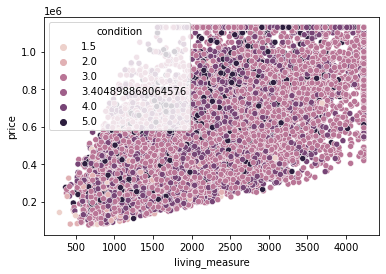

In [45]:
plt.figure()
sns.scatterplot(x='living_measure', y='price',hue='condition', data=house)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='price'>

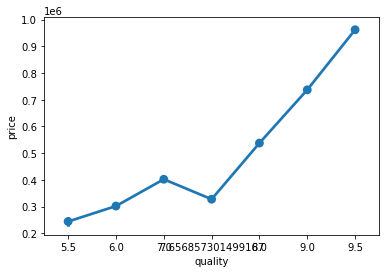

In [46]:
sns.pointplot(x='quality',y='price',data=house)

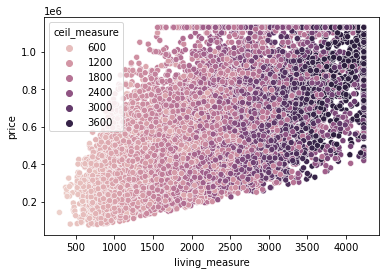

In [47]:
plt.figure()
sns.scatterplot(x='living_measure', y='price',hue='ceil_measure', data=house)
plt.show()

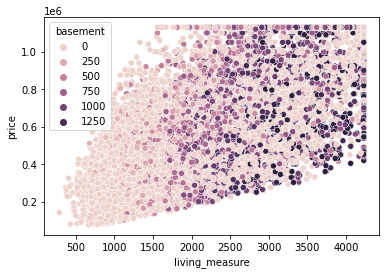

In [48]:
plt.figure()
sns.scatterplot(x='living_measure', y='price',hue='basement', data=house)
plt.show()

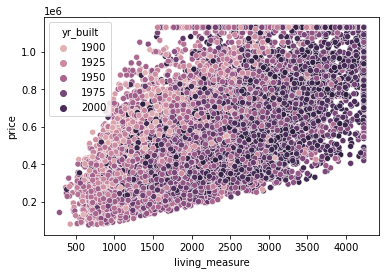

In [49]:
plt.figure()
sns.scatterplot(x='living_measure', y='price',hue='yr_built', data=house)
plt.show()

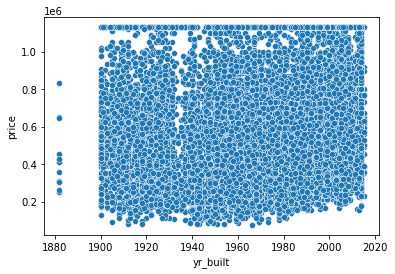

In [50]:
plt.figure()
sns.scatterplot(x='yr_built', y='price', data=house)
plt.show()

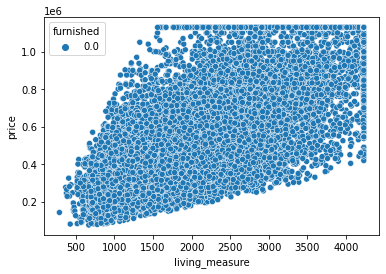

In [51]:
plt.figure()
sns.scatterplot(x='living_measure', y='price',hue='furnished', data=house)
plt.show()

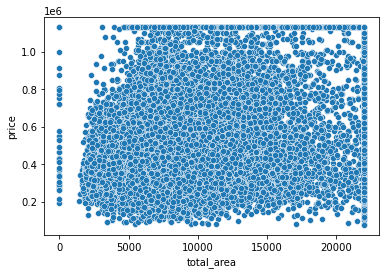

In [52]:
plt.figure()
sns.scatterplot(x='total_area', y='price', data=house)
plt.show()

In [53]:
from scipy.stats import zscore
house_scaled=house.apply(zscore)
house_scaled.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,-0.244812,0.353510,0.747254,-0.484520,1.182957,0.140961,-0.908072,NaN,NaN,-0.626268,...,2.316114,-0.168138,NaN,-0.821247,1.174564,0.225916,0.068521,0.080093,NaN,0.314752
1,-0.498766,-1.286213,-1.600035,-1.525941,-1.654958,-1.109902,-0.908072,NaN,NaN,0.910449,...,-0.681125,-0.779349,NaN,0.748736,-0.039353,-0.432946,-0.488273,-0.962602,NaN,-1.286324
2,0.886147,0.893419,0.747254,0.904042,1.171033,-1.245270,0.937417,NaN,NaN,-0.626268,...,-0.681125,-0.168138,NaN,0.748736,-0.297726,-0.302621,0.996510,-1.343780,NaN,-0.977090
3,0.958776,-1.018259,-0.426391,0.556902,-0.379089,-0.987559,0.937417,NaN,NaN,-0.626268,...,-0.681125,1.291975,NaN,-1.419335,-1.614847,0.008709,0.083987,-1.032572,NaN,-0.975988
4,1.171563,-0.246389,-1.600035,-1.525941,-1.118378,-0.816081,-0.908072,NaN,NaN,-0.626268,...,-0.681125,-1.594296,NaN,0.748736,0.045087,-0.512588,-1.323463,-0.733941,NaN,-0.930264


In [54]:
house_scaled.replace(nan,0, inplace=True)

In [55]:
house_scaled.head()

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,-0.244812,0.353510,0.747254,-0.484520,1.182957,0.140961,-0.908072,0.0,0.0,-0.626268,...,2.316114,-0.168138,0.0,-0.821247,1.174564,0.225916,0.068521,0.080093,0.0,0.314752
1,-0.498766,-1.286213,-1.600035,-1.525941,-1.654958,-1.109902,-0.908072,0.0,0.0,0.910449,...,-0.681125,-0.779349,0.0,0.748736,-0.039353,-0.432946,-0.488273,-0.962602,0.0,-1.286324
2,0.886147,0.893419,0.747254,0.904042,1.171033,-1.245270,0.937417,0.0,0.0,-0.626268,...,-0.681125,-0.168138,0.0,0.748736,-0.297726,-0.302621,0.996510,-1.343780,0.0,-0.977090
3,0.958776,-1.018259,-0.426391,0.556902,-0.379089,-0.987559,0.937417,0.0,0.0,-0.626268,...,-0.681125,1.291975,0.0,-1.419335,-1.614847,0.008709,0.083987,-1.032572,0.0,-0.975988
4,1.171563,-0.246389,-1.600035,-1.525941,-1.118378,-0.816081,-0.908072,0.0,0.0,-0.626268,...,-0.681125,-1.594296,0.0,0.748736,0.045087,-0.512588,-1.323463,-0.733941,0.0,-0.930264


In [56]:
from sklearn.cluster import KMeans 

In [57]:
k_means = KMeans(n_clusters = 3)
k_means.fit(house_scaled)
k_means.inertia_

266348.58864796895

In [58]:
wss =[] 

In [59]:
    for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(house_scaled)
        wss.append(KM.inertia_)

In [60]:
wss

[389034.0,
 299803.28749541775,
 266348.6115852585,
 241102.17166534974,
 224423.42762157563,
 211308.60690737425,
 199492.48804411202,
 191881.0949627467,
 185069.81740580898,
 179850.46062855955]

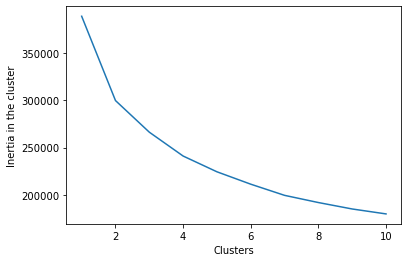

In [61]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [62]:
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(house_scaled)
labels_3 = k_means_3.labels_

In [63]:
kmeans3_dataset=house.copy()

In [64]:
kmeans3_dataset["Clus_kmeans"] = labels_3
kmeans3_dataset.head(5).T

,0,1,2,3,4
cid,3.876101e+09,3.145600e+09,7.129303e+09,7.338220e+09,7.950301e+09
price,6.000000e+05,1.900000e+05,7.350000e+05,2.570000e+05,4.500000e+05
room_bed,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00
room_bath,1.750000e+00,1.000000e+00,2.750000e+00,2.500000e+00,1.000000e+00
living_measure,3.050000e+03,6.700000e+02,3.040000e+03,1.740000e+03,1.120000e+03
lot_measure,9.440000e+03,3.101000e+03,2.415000e+03,3.721000e+03,4.590000e+03
ceil,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
coast,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sight,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
condition,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [66]:
silhouette_score(house_scaled,labels_3)

0.16709952667661854

In [67]:
sil_width = silhouette_samples(house_scaled,labels_3)

In [68]:
kmeans3_dataset["sil_width"] = sil_width
kmeans3_dataset.head().T

,0,1,2,3,4
cid,3.876101e+09,3.145600e+09,7.129303e+09,7.338220e+09,7.950301e+09
price,6.000000e+05,1.900000e+05,7.350000e+05,2.570000e+05,4.500000e+05
room_bed,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,2.000000e+00
room_bath,1.750000e+00,1.000000e+00,2.750000e+00,2.500000e+00,1.000000e+00
living_measure,3.050000e+03,6.700000e+02,3.040000e+03,1.740000e+03,1.120000e+03
lot_measure,9.440000e+03,3.101000e+03,2.415000e+03,3.721000e+03,4.590000e+03
ceil,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
coast,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
sight,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
condition,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [69]:
housee = pd.get_dummies(house, columns=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 
                                        'furnished'],drop_first=True)


In [70]:
housee.columns

Index(['cid', 'price', 'living_measure', 'lot_measure', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_2.0',
       'room_bed_3.0', 'room_bed_3.3713554987212278', 'room_bed_4.0',
       'room_bed_5.0', 'room_bed_5.5', 'room_bath_0.75', 'room_bath_1.0',
       'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0',
       'room_bath_2.1151708904905835', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.625', 'ceil_1.0', 'ceil_1.4920495109174354', 'ceil_1.5',
       'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'condition_2.0',
       'condition_3.0', 'condition_3.404898868064576', 'condition_4.0',
       'condition_5.0', 'quality_6.0', 'quality_7.0',
       'quality_7.656857301499167', 'quality_8.0', 'quality_9.0',
       'quality_9.5'],
      dtype='object')

In [71]:
housee.head()

,cid,price,living_measure,lot_measure,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,...,condition_3.0,condition_3.404898868064576,condition_4.0,condition_5.0,quality_6.0,quality_7.0,quality_7.656857301499167,quality_8.0,quality_9.0,quality_9.5
0,3.876101e+09,600000.0,3050.0,9440.0,1800.0,1250.0,1966.0,0.0,98034.0,47.7228,...,1,0,0,0,0,0,0,1,0,0
1,3.145600e+09,190000.0,670.0,3101.0,670.0,0.0,1948.0,0.0,98118.0,47.5546,...,0,0,1,0,1,0,0,0,0,0
2,7.129303e+09,735000.0,3040.0,2415.0,3040.0,0.0,1966.0,0.0,98118.0,47.5188,...,1,0,0,0,0,0,0,1,0,0
3,7.338220e+09,257000.0,1740.0,3721.0,1740.0,0.0,2009.0,0.0,98002.0,47.3363,...,1,0,0,0,0,0,0,1,0,0
4,7.950301e+09,450000.0,1120.0,4590.0,1120.0,0.0,1924.0,0.0,98118.0,47.5663,...,1,0,0,0,0,1,0,0,0,0


In [72]:
X = housee.drop("price" , axis=1)
y = housee["price"]

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [75]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predte= LR1.predict(X_test)

LR1.coef_

array([-7.69198129e-07,  1.16935000e+02, -3.32747044e+00, -2.68892249e+01,
       -1.26356716e+01, -1.95290436e+03,  1.68041565e-05, -2.90619802e+02,
        5.27236121e+05, -8.20681600e+04,  6.12566490e+01, -1.98816572e+00,
        2.57794139e+00,  9.47937877e+03, -1.07226252e+04, -3.03610828e+04,
       -2.86992192e+04, -4.50365903e+04, -7.55854011e+04, -1.57248091e+04,
       -2.91720141e+04,  6.15931192e+04, -2.33537057e+04, -1.18650176e+04,
       -5.92642674e+03, -3.03610828e+04, -9.25664269e+02, -8.84589129e+03,
        1.13140930e+04,  2.31299127e+04,  5.17965221e+04,  5.91890217e+04,
        1.03542289e+05, -3.20191358e+04,  3.45661277e+04, -7.27791445e+03,
       -1.03878726e+04,  1.58642051e+04,  2.85195541e+04,  1.70504162e+05,
       -4.68313234e+04, -3.30780478e+04,  1.31207094e+04, -5.32474741e+03,
        2.64434731e+04,  3.05248348e+04,  8.40985543e+04, -7.37963465e+04,
        1.67538788e+05,  2.85862230e+05,  3.78698283e+05])

In [76]:
print("Accuracy score  for Linear regression  train variables ")
linear_train_score = LR1.score(X_train, y_train)
print (linear_train_score)

Accuracy score  for Linear regression  train variables 
0.7492158823846885


In [77]:
print("Accuracy score  for Linear regression  train variables ")
linear_train_score = LR1.score(X_test, y_test)
print (linear_train_score)

Accuracy score  for Linear regression  train variables 
0.7452760214492499


In [78]:
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

LR1_tescore=r2_score(y_test,y_LR1_predte)
LR1_teRMSE=np.sqrt(mean_squared_error(y_test, y_LR1_predte))
LR1_teMSE=mean_squared_error(y_test, y_LR1_predte)
LR1_teMAE=mean_absolute_error(y_test, y_LR1_predte)

Compa_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Test Score':LR1_tescore,'RMSE_te': LR1_teRMSE, 'MSE_te': LR1_teMSE, 'MAE_te': LR1_teMAE,'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE, 'MSE_tr': LR1_trMSE, 'MAE_tr': LR1_trMAE})


In [79]:
Compa_df

,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.25734,0.749216,125885.449637,1.584715e+10,94575.413149


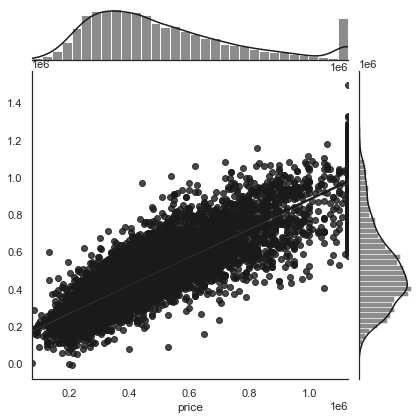

In [80]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_LR1_predte, kind="reg", color="k")

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)

#predicting result over test data
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predte= knn1.predict(X_test)

In [83]:
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)

knn1_tescore=r2_score(y_test,y_knn1_predte)
knn1_teRMSE=np.sqrt(mean_squared_error(y_test, y_knn1_predte))
knn1_teMSE=mean_squared_error(y_test, y_knn1_predte)
knn1_teMAE=mean_absolute_error(y_test, y_knn1_predte)

knn1_df=pd.DataFrame({'Method':['knn1'],'Test Score':knn1_tescore,'RMSE_te': knn1_teRMSE, 'MSE_te': knn1_teMSE, 'MAE_te': knn1_teMAE,'train Score':knn1_trscore,'RMSE_tr': knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr': knn1_trMAE})
Compa_df = pd.concat([Compa_df, knn1_df])

Compa_df


,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.257340,0.749216,125885.449637,1.584715e+10,94575.413149
0,knn1,0.579477,160104.182901,2.563335e+10,104275.872434,0.998145,10827.489497,1.172345e+08,2475.561996


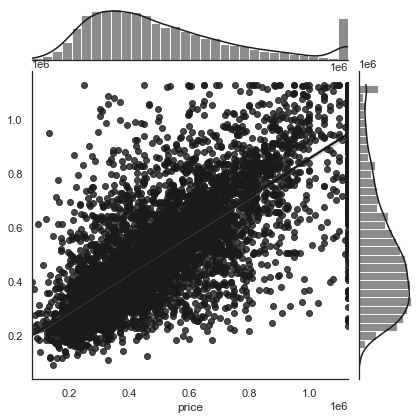

In [84]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_knn1_predte, kind="reg", color="k")

In [85]:
from sklearn.tree import DecisionTreeRegressor


In [86]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predte= DT1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)

DT1_tescore=r2_score(y_test,y_DT1_predte)
DT1_teRMSE=np.sqrt(mean_squared_error(y_test, y_DT1_predte))
DT1_teMSE=mean_squared_error(y_test, y_DT1_predte)
DT1_teMAE=mean_absolute_error(y_test, y_DT1_predte)

DT1_df=pd.DataFrame({'Method':['DT1'],'Test Score':DT1_tescore,'RMSE_te': DT1_teRMSE, 'MSE_te': DT1_teMSE, 'MAE_te': DT1_teMAE,'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr': DT1_trMAE})
Compa_df = pd.concat([Compa_df, DT1_df])

Compa_df

,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.257340,0.749216,125885.449637,1.584715e+10,94575.413149
0,knn1,0.579477,160104.182901,2.563335e+10,104275.872434,0.998145,10827.489497,1.172345e+08,2475.561996
0,DT1,0.759041,121193.580800,1.468788e+10,80701.996684,0.998861,8484.654337,7.198936e+07,723.499636


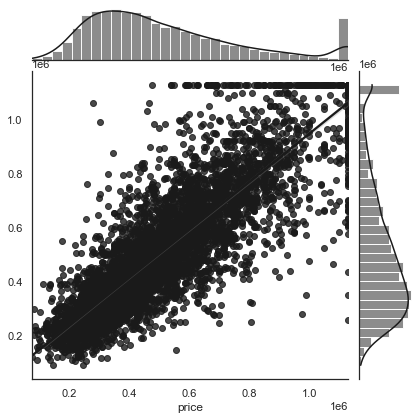

In [87]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_DT1_predte, kind="reg", color="k")

In [88]:
from sklearn.metrics import classification_report,confusion_matrix


First 15 feature importance:	 Imp    97.645
dtype: float64
First 25 feature importance:	 Imp    99.105
dtype: float64


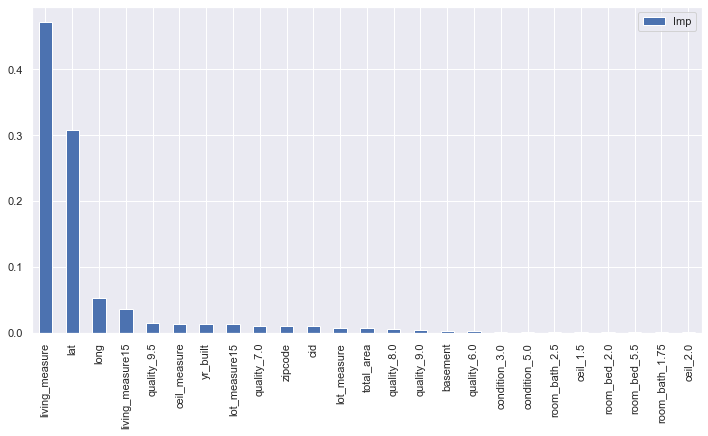

In [89]:
DT_imp_feature_1=pd.DataFrame(DT1.feature_importances_, columns = ["Imp"], index = X_test.columns)
DT_imp_feature_1.sort_values(by="Imp",ascending=False)
DT_imp_feature_1['Imp'] = DT_imp_feature_1['Imp'].map('{0:.5f}'.format)
DT_imp_feature_1=DT_imp_feature_1.sort_values(by="Imp",ascending=False)
DT_imp_feature_1.Imp=DT_imp_feature_1.Imp.astype("float")

plotSizeX = 12
plotSizeY = 6
DT_imp_feature_1[:25].plot.bar(figsize=(plotSizeX, plotSizeY))

#First 15 features have an importance of 90.5% and first 25 have importance of 95.15
print("First 15 feature importance:\t",(DT_imp_feature_1[:15].sum())*100)
print("First 25 feature importance:\t",(DT_imp_feature_1[:25].sum())*100)

In [90]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [91]:
GB1=GradientBoostingRegressor(n_estimators = 150, random_state=1)
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predte= GB1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)

GB1_tescore=r2_score(y_test,y_GB1_predte)
GB1_teRMSE=np.sqrt(mean_squared_error(y_test, y_GB1_predte))
GB1_teMSE=mean_squared_error(y_test, y_GB1_predte)
GB1_teMAE=mean_absolute_error(y_test, y_GB1_predte)

GB1_df=pd.DataFrame({'Method':['GB1'],'Test Score':GB1_tescore,'RMSE_te': GB1_teRMSE, 'MSE_te': GB1_teMSE, 'MAE_te': GB1_teMAE,'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE, 'MSE_tr': GB1_trMSE, 'MAE_tr': GB1_trMAE})
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.257340,0.749216,125885.449637,1.584715e+10,94575.413149
0,knn1,0.579477,160104.182901,2.563335e+10,104275.872434,0.998145,10827.489497,1.172345e+08,2475.561996
0,DT1,0.759041,121193.580800,1.468788e+10,80701.996684,0.998861,8484.654337,7.198936e+07,723.499636
0,GB1,0.869774,89095.567977,7.938020e+09,63043.239940,0.888199,84051.980578,7.064735e+09,59469.281350


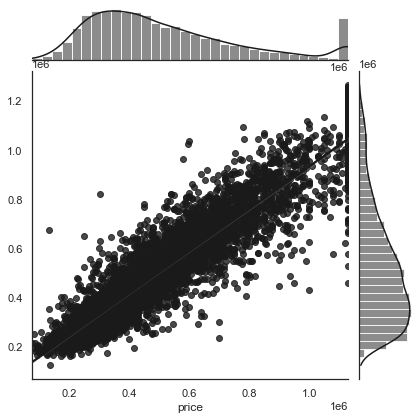

In [92]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_GB1_predte, kind="reg", color="k")

First 15 feature importance:	 Imp    99.32
dtype: float64
First 25 feature importance:	 Imp    99.926
dtype: float64


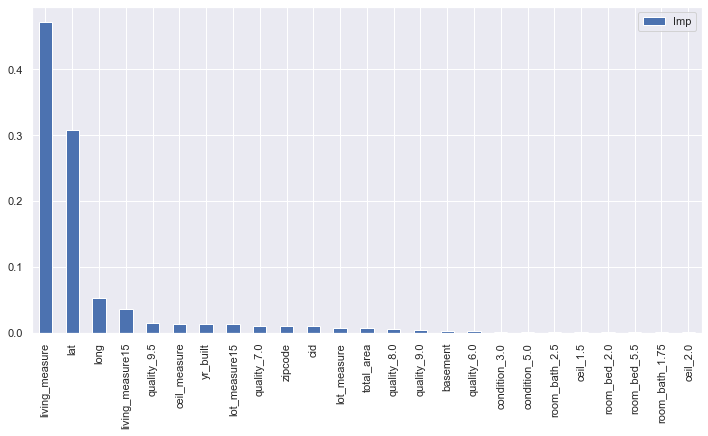

In [93]:
GB_imp_feature_1=pd.DataFrame(GB1.feature_importances_, columns = ["Imp"], index = X_test.columns)
GB_imp_feature_1.sort_values(by="Imp",ascending=False)
GB_imp_feature_1['Imp'] = GB_imp_feature_1['Imp'].map('{0:.5f}'.format)
GB_imp_feature_1=GB_imp_feature_1.sort_values(by="Imp",ascending=False)
GB_imp_feature_1.Imp=GB_imp_feature_1.Imp.astype("float")

plotSizeX = 12
plotSizeY = 6
DT_imp_feature_1[:25].plot.bar(figsize=(plotSizeX, plotSizeY))

#First 15 features have an importance of 90.5% and first 25 have importance of 95.15
print("First 15 feature importance:\t",(GB_imp_feature_1[:15].sum())*100)
print("First 25 feature importance:\t",(GB_imp_feature_1[:25].sum())*100)

In [94]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=1)
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predte= BGG1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)

BGG1_tescore=r2_score(y_test,y_BGG1_predte)
BGG1_teRMSE=np.sqrt(mean_squared_error(y_test, y_BGG1_predte))
BGG1_teMSE=mean_squared_error(y_test, y_BGG1_predte)
BGG1_teMAE=mean_absolute_error(y_test, y_BGG1_predte)

BGG1_df=pd.DataFrame({'Method':['BGG1'],'Test Score':BGG1_tescore,'RMSE_te': BGG1_teRMSE, 'MSE_te':BGG1_teMSE, 'MAE_te': BGG1_teMAE,'train Score':BGG1_trscore,'RMSE_tr': BGG1_trRMSE, 'MSE_tr': BGG1_trMSE, 'MAE_tr': BGG1_trMAE})
Compa_df = pd.concat([Compa_df, BGG1_df])

Compa_df

,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.257340,0.749216,125885.449637,1.584715e+10,94575.413149
0,knn1,0.579477,160104.182901,2.563335e+10,104275.872434,0.998145,10827.489497,1.172345e+08,2475.561996
0,DT1,0.759041,121193.580800,1.468788e+10,80701.996684,0.998861,8484.654337,7.198936e+07,723.499636
0,GB1,0.869774,89095.567977,7.938020e+09,63043.239940,0.888199,84051.980578,7.064735e+09,59469.281350
0,BGG1,0.879735,85620.474999,7.330866e+09,57978.604793,0.982229,33510.594705,1.122960e+09,22146.534143


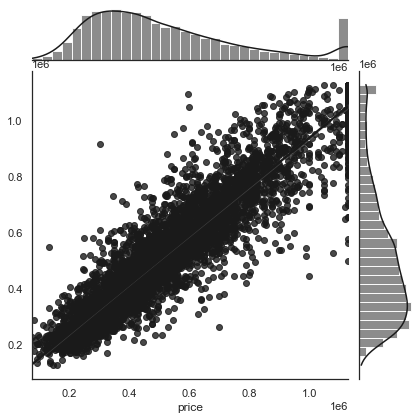

In [95]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_BGG1_predte, kind="reg", color="k")

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predte= RF1.predict(X_test)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)


RF1_tescore=r2_score(y_test,y_RF1_predte)
RF1_teRMSE=np.sqrt(mean_squared_error(y_test, y_RF1_predte))
RF1_teMSE=mean_squared_error(y_test, y_RF1_predte)
RF1_teMAE=mean_absolute_error(y_test, y_RF1_predte)

RF1_df=pd.DataFrame({'Method':['RF1'],'Test Score':RF1_tescore,'RMSE_te': RF1_teRMSE, 'MSE_te':RF1_teMSE, 'MAE_te': RF1_teMAE,'train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE, 'MSE_tr': RF1_trMSE, 'MAE_tr': RF1_trMAE})
Compa_df = pd.concat([Compa_df, RF1_df])

Compa_df

,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.257340,0.749216,125885.449637,1.584715e+10,94575.413149
0,knn1,0.579477,160104.182901,2.563335e+10,104275.872434,0.998145,10827.489497,1.172345e+08,2475.561996
0,DT1,0.759041,121193.580800,1.468788e+10,80701.996684,0.998861,8484.654337,7.198936e+07,723.499636
0,GB1,0.869774,89095.567977,7.938020e+09,63043.239940,0.888199,84051.980578,7.064735e+09,59469.281350
0,BGG1,0.879735,85620.474999,7.330866e+09,57978.604793,0.982229,33510.594705,1.122960e+09,22146.534143
0,RF1,0.881255,85077.635920,7.238204e+09,57457.737028,0.982963,32811.108609,1.076569e+09,21767.966774


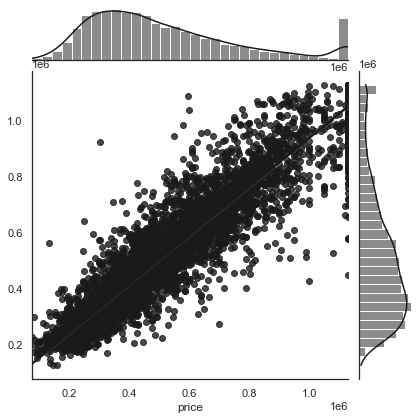

In [98]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_RF1_predte, kind="reg", color="k")

First 15 feature importance:	 Imp    97.748
dtype: float64
First 25 feature importance:	 Imp    99.03
dtype: float64


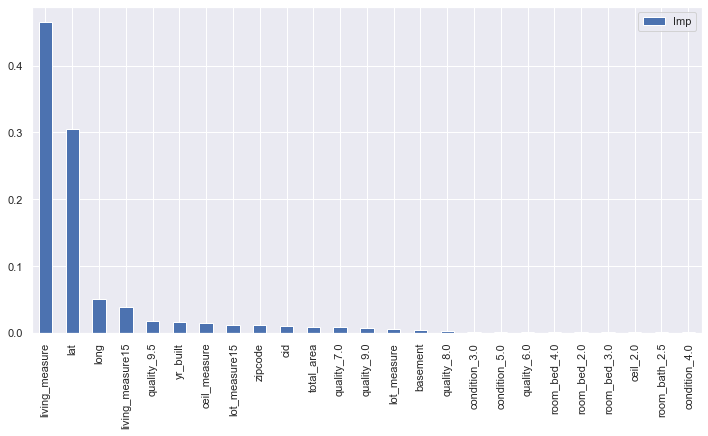

In [99]:
rf_imp_feature_1=pd.DataFrame(RF1.feature_importances_, columns = ["Imp"], index = X_test.columns)
rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1['Imp'] = rf_imp_feature_1['Imp'].map('{0:.5f}'.format)
rf_imp_feature_1=rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1.Imp=rf_imp_feature_1.Imp.astype("float")

plotSizeX = 12
plotSizeY = 6
rf_imp_feature_1[:25].plot.bar(figsize=(plotSizeX, plotSizeY))

#First 15 features have an importance of 90.5% and first 25 have importance of 95.15
print("First 15 feature importance:\t",(rf_imp_feature_1[:15].sum())*100)
print("First 25 feature importance:\t",(rf_imp_feature_1[:25].sum())*100)

In [100]:
rf_imp_feature_1[:30]


,Imp
living_measure,0.46516
lat,0.30490
long,0.05124
living_measure15,0.03841
quality_9.5,0.01826
yr_built,0.01579
ceil_measure,0.01508
lot_measure15,0.01222
zipcode,0.01095
cid,0.00951


In [101]:
from sklearn.pipeline import Pipeline


In [102]:
Compa_df

,Method,Test Score,RMSE_te,MSE_te,MAE_te,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.745276,124607.089446,1.552693e+10,94336.257340,0.749216,125885.449637,1.584715e+10,94575.413149
0,knn1,0.579477,160104.182901,2.563335e+10,104275.872434,0.998145,10827.489497,1.172345e+08,2475.561996
0,DT1,0.759041,121193.580800,1.468788e+10,80701.996684,0.998861,8484.654337,7.198936e+07,723.499636
0,GB1,0.869774,89095.567977,7.938020e+09,63043.239940,0.888199,84051.980578,7.064735e+09,59469.281350
0,BGG1,0.879735,85620.474999,7.330866e+09,57978.604793,0.982229,33510.594705,1.122960e+09,22146.534143
0,RF1,0.881255,85077.635920,7.238204e+09,57457.737028,0.982963,32811.108609,1.076569e+09,21767.966774


In [103]:
housee.shape

(21613, 52)

In [104]:
housee.columns

Index(['cid', 'price', 'living_measure', 'lot_measure', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_2.0',
       'room_bed_3.0', 'room_bed_3.3713554987212278', 'room_bed_4.0',
       'room_bed_5.0', 'room_bed_5.5', 'room_bath_0.75', 'room_bath_1.0',
       'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75', 'room_bath_2.0',
       'room_bath_2.1151708904905835', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.625', 'ceil_1.0', 'ceil_1.4920495109174354', 'ceil_1.5',
       'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'condition_2.0',
       'condition_3.0', 'condition_3.404898868064576', 'condition_4.0',
       'condition_5.0', 'quality_6.0', 'quality_7.0',
       'quality_7.656857301499167', 'quality_8.0', 'quality_9.0',
       'quality_9.5'],
      dtype='object')

In [105]:
predictors = [x for x in housee.columns if x not in ['price']]

def modelfit(alg, dxtrain, dytrain, printFeatureImportance=True):
    #feature importance
    alg.fit(dxtrain,dytrain)
    alg_imp_feature_1=pd.DataFrame(alg.feature_importances_, columns = ["Imp"], index = predictors)
    alg_imp_feature_1.sort_values(by="Imp",ascending=False)
    alg_imp_feature_1['Imp'] = alg_imp_feature_1['Imp'].map('{0:.5f}'.format)
    alg_imp_feature_1=alg_imp_feature_1.sort_values(by="Imp",ascending=False)
    alg_imp_feature_1.Imp=alg_imp_feature_1.Imp.astype("float")
    
    feat_30list=list(alg_imp_feature_1.index[:30])
    

    
    if printFeatureImportance:
        alg_imp_feature_1[:30].plot.bar(figsize=(plotSizeX, plotSizeY))
        #First 20 features have an importance of 90.5% and first 30 have importance of 95.15
        print("First 25 feature importance:\t",(alg_imp_feature_1[:25].sum())*100)
        print("First 30 feature importance:\t",(alg_imp_feature_1[:30].sum())*100)
        
    return feat_30list

First 25 feature importance:	 Imp    99.926
dtype: float64
First 30 feature importance:	 Imp    99.988
dtype: float64


['living_measure',
 'lat',
 'living_measure15',
 'quality_9.5',
 'long',
 'quality_9.0',
 'yr_built',
 'ceil_measure',
 'zipcode',
 'quality_8.0',
 'lot_measure15',
 'quality_7.0',
 'total_area',
 'lot_measure',
 'condition_5.0',
 'quality_6.0',
 'basement',
 'condition_3.0',
 'cid',
 'room_bed_5.5',
 'room_bath_3.625',
 'room_bed_5.0',
 'room_bath_2.5',
 'room_bed_2.0',
 'condition_4.0',
 'condition_2.0',
 'ceil_3.0',
 'ceil_2.0',
 'room_bath_1.0',
 'room_bath_1.25']

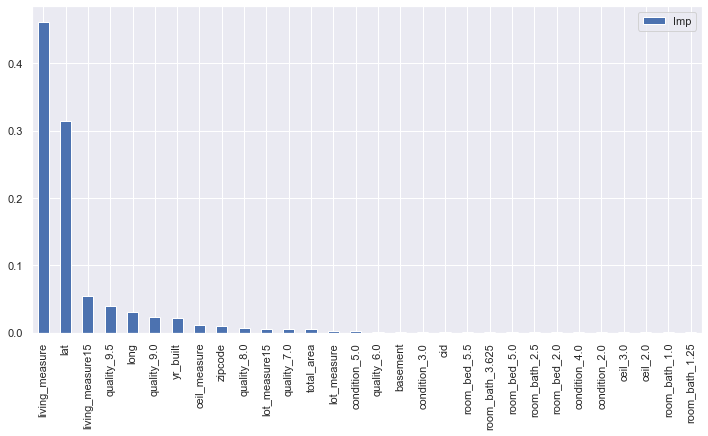

In [106]:
modelfit(GB1,X_train,y_train)

First 25 feature importance:	 Imp    99.021
dtype: float64
First 30 feature importance:	 Imp    99.377
dtype: float64


['living_measure',
 'lat',
 'long',
 'living_measure15',
 'quality_9.5',
 'yr_built',
 'ceil_measure',
 'lot_measure15',
 'zipcode',
 'cid',
 'total_area',
 'quality_7.0',
 'quality_9.0',
 'lot_measure',
 'basement',
 'quality_8.0',
 'condition_3.0',
 'condition_5.0',
 'quality_6.0',
 'room_bed_2.0',
 'room_bed_3.0',
 'room_bath_2.5',
 'room_bed_4.0',
 'ceil_2.0',
 'condition_4.0',
 'room_bath_2.25',
 'ceil_1.5',
 'room_bath_1.75',
 'ceil_1.0',
 'room_bath_2.75']

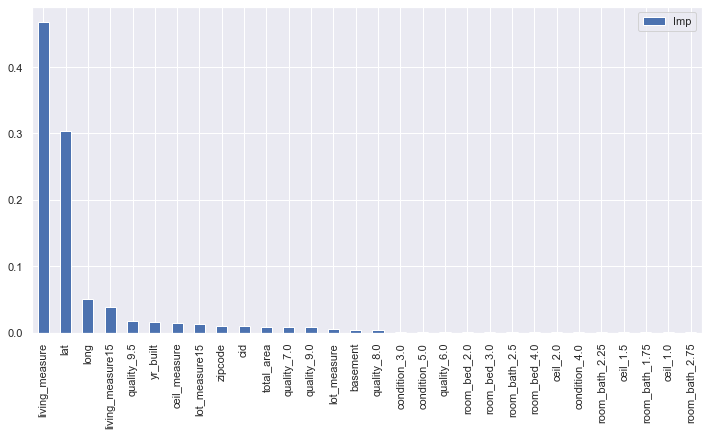

In [107]:
modelfit(RF1,X_train,y_train)


In [108]:
feat_list_GB1=modelfit(GB1,X_train,y_train, printFeatureImportance=False)
print(feat_list_GB1)

feat_list_RF1=modelfit(RF1,X_train,y_train, printFeatureImportance=False)
print(feat_list_RF1)

['living_measure', 'lat', 'living_measure15', 'quality_9.5', 'long', 'quality_9.0', 'yr_built', 'ceil_measure', 'zipcode', 'quality_8.0', 'lot_measure15', 'quality_7.0', 'total_area', 'lot_measure', 'condition_5.0', 'quality_6.0', 'basement', 'condition_3.0', 'cid', 'room_bed_5.5', 'room_bath_3.625', 'room_bed_5.0', 'room_bath_2.5', 'room_bed_2.0', 'condition_4.0', 'condition_2.0', 'ceil_3.0', 'ceil_2.0', 'room_bath_1.0', 'room_bath_1.25']
['living_measure', 'lat', 'long', 'living_measure15', 'quality_9.5', 'yr_built', 'ceil_measure', 'lot_measure15', 'zipcode', 'total_area', 'cid', 'quality_7.0', 'quality_9.0', 'lot_measure', 'basement', 'quality_8.0', 'condition_3.0', 'condition_5.0', 'quality_6.0', 'room_bed_2.0', 'room_bed_3.0', 'room_bed_4.0', 'room_bath_2.5', 'ceil_2.0', 'condition_4.0', 'ceil_1.5', 'room_bath_2.25', 'room_bath_1.75', 'room_bath_2.0', 'ceil_1.0']


In [109]:
Key_feat=list(set(feat_list_GB1).union(feat_list_RF1))
print(len(Key_feat))
print(Key_feat)

37
['room_bath_2.5', 'room_bath_3.625', 'room_bath_2.0', 'ceil_1.0', 'quality_9.0', 'condition_4.0', 'room_bed_5.5', 'room_bath_2.25', 'quality_8.0', 'cid', 'ceil_3.0', 'lat', 'quality_6.0', 'living_measure15', 'quality_9.5', 'quality_7.0', 'room_bath_1.0', 'condition_5.0', 'basement', 'living_measure', 'long', 'yr_built', 'ceil_2.0', 'lot_measure15', 'room_bath_1.25', 'room_bed_4.0', 'ceil_measure', 'ceil_1.5', 'room_bath_1.75', 'condition_2.0', 'room_bed_3.0', 'lot_measure', 'room_bed_2.0', 'total_area', 'room_bed_5.0', 'zipcode', 'condition_3.0']


In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [111]:
param_grid = {
    'loss':['ls','lad','huber'],
    'bootstrap': ['True','False'],
    'max_depth': range(5,11,1),
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.05,0.1,0.2,0.25],
    'min_samples_leaf': [4,10,20],
    'min_samples_split': [5,10,1000],
    'n_estimators': [10,50,100,150,200],
    'subsample':[0.8,1]
}


In [112]:
GBR_test=GradientBoostingRegressor(random_state=22)

In [113]:
param_grid1 = {'n_estimators': range(50,401,50)}

In [114]:
grid_search1 = GridSearchCV(estimator = GBR_test, param_grid = param_grid1, 
                          cv = 3, n_jobs = 2, verbose = 1)

In [115]:
grid_search1.fit(X_train,y_train)
grid_search1.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'n_estimators': 400}

In [116]:
grid_search1.best_params_, grid_search1.best_score_


({'n_estimators': 400}, 0.8840639697129954)

In [117]:
param_grid2 = {'n_estimators': range(400,1001,200)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 3, n_jobs = 2, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2, param_grid={'n_estimators': range(400, 1001, 200)},
             verbose=1)

In [118]:
grid_search2.cv_results_,grid_search2.best_params_, grid_search2.best_score_

({'mean_fit_time': array([ 9.44697134, 15.56402906, 18.77550419, 22.02490226]),
  'std_fit_time': array([0.55601231, 0.03693762, 0.87464555, 0.06897399]),
  'mean_score_time': array([0.02535232, 0.03726029, 0.04057034, 0.04885308]),
  'std_score_time': array([1.25717297e-03, 4.21198119e-04, 2.99348196e-04, 8.34390849e-05]),
  'param_n_estimators': masked_array(data=[400, 600, 800, 1000],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 400},
   {'n_estimators': 600},
   {'n_estimators': 800},
   {'n_estimators': 1000}],
  'split0_test_score': array([0.87564575, 0.87868606, 0.87990547, 0.88055835]),
  'split1_test_score': array([0.88271015, 0.88545291, 0.88635705, 0.88700406]),
  'split2_test_score': array([0.89383601, 0.89457074, 0.89508158, 0.8953219 ]),
  'mean_test_score': array([0.88406397, 0.88623657, 0.8871147 , 0.8876281 ]),
  'std_test_score': array([0.00748759, 0.00650852, 0.00621874, 0.006043

In [119]:
param_grid2 = {'n_estimators': range(1000,2000,300)}
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search2 = GridSearchCV(estimator = GBR_test, param_grid = param_grid2, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3, param_grid={'n_estimators': range(1000, 2000, 300)},
             verbose=1)

In [120]:
grid_search2.best_params_, grid_search2.best_score_

({'n_estimators': 1300}, 0.8894127813896191)

In [121]:
param_grid3 = {
    'learning_rate': [0.1,0.2],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
    'n_estimators': [500,1000],
}

In [122]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search3 = GridSearchCV(estimator = GBR_test, param_grid = param_grid3, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.2],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [500, 1000]},
             verbose=1)

In [123]:
grid_search3.best_params_, grid_search3.best_score_

({'learning_rate': 0.1,
  'min_samples_leaf': 20,
  'min_samples_split': 5,
  'n_estimators': 1000},
 0.8914587136745862)

In [124]:
param_grid4 = {
    'learning_rate': [0.1,0.15],
    'max_depth': [5,10],
    'min_samples_leaf': [5,8],
    'min_samples_split': [20,30],
    'n_estimators': [1000],
}

In [125]:
GBR_test=GradientBoostingRegressor(random_state=22)

grid_search4 = GridSearchCV(estimator = GBR_test, param_grid = param_grid4, 
                          cv = 5, n_jobs = 3, verbose = 1)
grid_search4.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.15], 'max_depth': [5, 10],
                         'min_samples_leaf': [5, 8],
                         'min_samples_split': [20, 30],
                         'n_estimators': [1000]},
             verbose=1)

In [126]:

grid_search4.best_params_, grid_search4.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 30,
  'n_estimators': 1000},
 0.8916253162098087)

In [127]:
param_grid5 = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8,10],
    'min_samples_split': [30,40],
    'n_estimators': [1000],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search5 = GridSearchCV(estimator = GBR_test, param_grid = param_grid5, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_search5.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [8, 10],
                         'min_samples_split': [30, 40],
                         'n_estimators': [1000]},
             verbose=1)

In [128]:
grid_search5.best_params_, grid_search5.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 30,
  'n_estimators': 1000},
 0.8914871595473279)

In [129]:
param_grid6 = {
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8],
    'min_samples_split': [40,50],
    'n_estimators': [1000],
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search6 = GridSearchCV(estimator = GBR_test, param_grid = param_grid6, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_search6.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [8], 'min_samples_split': [40, 50],
                         'n_estimators': [1000]},
             verbose=1)

In [130]:
grid_search6.best_params_, grid_search6.best_score_

({'learning_rate': 0.1,
  'max_depth': 5,
  'min_samples_leaf': 8,
  'min_samples_split': 40,
  'n_estimators': 1000},
 0.8910705832161971)

In [131]:
param_grid7 = {
    'loss':['ls','lad','huber'],
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_leaf': [8],
    'min_samples_split': [40],
    'n_estimators': [1000],
    'subsample':[0.8,1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_search7 = GridSearchCV(estimator = GBR_test, param_grid = param_grid7, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_search7.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/dineshyadav/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=22),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [5], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [8], 'min_samples_split': [40],
                         'n_estimators': [1000], 'subsample': [0.8, 1]},
             verbose=1)

In [132]:
grid_search7.best_params_, grid_search7.best_score_

({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 8,
  'min_samples_split': 40,
  'n_estimators': 1000,
  'subsample': 0.8},
 0.8947443123750081)

In [133]:
param_gridF = {
    'loss':['huber'],
    'max_features': ['sqrt'],
    'learning_rate': [0.1,0.2],
    'max_depth': [5,8],
    'min_samples_leaf': [5],
    'min_samples_split': [40,50],
    'n_estimators': [1000],
    'subsample':[1]
}

GBR_test=GradientBoostingRegressor(random_state=22)

grid_searchF = GridSearchCV(estimator = GBR_test, param_grid = param_gridF, 
                          cv = 5, n_jobs = 2, verbose = 1)
grid_searchF.fit(X_train,y_train)
grid_searchF.best_params_,grid_searchF.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


({'learning_rate': 0.1,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 50,
  'n_estimators': 1000,
  'subsample': 1},
 0.8910464074319181)

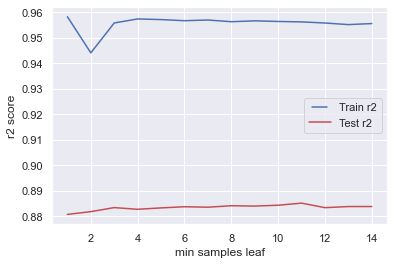

In [135]:
min_samples_leafs = range(1, 15, 1)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=40,
        min_samples_leaf=min_samples_leaf,
        max_depth=5,
        random_state=22,
        alpha=0.9,
)
   GBR_test.fit(X_train,y_train)
   y_GBR_predtr= GBR_test.predict(X_train)
   y_GBR_predte= GBR_test.predict(X_test)
   
   result_leafs_tr=r2_score(y_GBR_predtr,y_train)
   train_results.append(result_leafs_tr)
   result_leafs_te=r2_score(y_GBR_predte,y_test)
   test_results.append(result_leafs_te)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs,train_results,"b", label='Train r2')
line2, = plt.plot(min_samples_leafs, test_results,"r", label='Test r2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("r2 score")
plt.xlabel("min samples leaf")
plt.show()


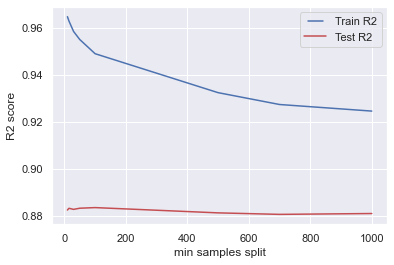

In [136]:
min_samples_splits = [10,15,30,50,100,500,700,1000]
train_results_spt = []
test_results_spt = []
for min_samples_split in min_samples_splits:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=min_samples_split,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_predtr= GBR_test.predict(X_train)
   y_GBR_predte= GBR_test.predict(X_test)
   
   result_spt_tr=r2_score(y_GBR_predtr,y_train)
   train_results_spt.append(result_spt_tr)
   result_spt_te=r2_score(y_GBR_predte,y_test)
   test_results_spt.append(result_spt_te)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,train_results_spt,"b", label='Train R2')
line2, = plt.plot(min_samples_splits, test_results_spt,"r", label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("min samples split")
plt.show()

In [ ]:
min_samples_splits = [10,15,20,30,40,50,60,70,80,90,100]
train_results_spt = []
test_results_spt = []
for min_samples_split in min_samples_splits:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=min_samples_split,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_predtr= GBR_test.predict(X_train)
   y_GBR_predte= GBR_test.predict(X_test)
   
   result_spt_tr=r2_score(y_GBR_predtr,y_train)
   train_results_spt.append(result_spt_tr)
   result_spt_te=r2_score(y_GBR_predte,y_test)
   test_results_spt.append(result_spt_te)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,train_results_spt,"b", label='Train R2')
line2, = plt.plot(min_samples_splits, test_results_spt,"r", label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("min samples split")
plt.show()

In [ ]:
min_samples_splits = [7,8,9,10,11,12,13,14,15,20]
train_results_spt = []
test_results_spt = []
for min_samples_split in min_samples_splits:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=min_samples_split,
        min_samples_leaf=5,
        max_depth=5,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_predtr= GBR_test.predict(X_train)
   y_GBR_predte= GBR_test.predict(X_test)
   
   result_spt_tr=r2_score(y_GBR_predtr,y_train)
   train_results_spt.append(result_spt_tr)
   result_spt_te=r2_score(y_GBR_predte,y_test)
   test_results_spt.append(result_spt_te)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,train_results_spt,"b", label='Train R2')
line2, = plt.plot(min_samples_splits, test_results_spt,"r", label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("min samples split")
plt.show()


In [ ]:
max_depths = range(3,11,1)
train_results_dpt = []
test_results_dpt = []
for max_depth in max_depths:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=1000,
        subsample=1.0,
        min_samples_split=10,
        min_samples_leaf=6,
        max_depth=max_depth,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_predtr= GBR_test.predict(X_train)
   y_GBR_predte= GBR_test.predict(X_test)
   
   result_dpt_tr=r2_score(y_GBR_predtr,y_train)
   train_results_dpt.append(result_dpt_tr)
   result_dpt_te=r2_score(y_GBR_predte,y_test)
   test_results_dpt.append(result_dpt_te)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths,train_results_dpt,"b", label='Train R2')
line2, = plt.plot(max_depths, test_results_dpt,"r", label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("max depth")
plt.show()


In [ ]:
estimators = range(100,1500,100)
train_results_est = []
test_results_est = []
for n_estimators in estimators:
   GBR_test=GradientBoostingRegressor(
        loss='huber',
        learning_rate=0.1,
        n_estimators=n_estimators,
        subsample=1.0,
        min_samples_split=30,
        min_samples_leaf=6,
        max_depth=9,
        random_state=22,
        alpha=0.9,
        )
   GBR_test.fit(X_train,y_train)
   y_GBR_predtr= GBR_test.predict(X_train)
   y_GBR_predte= GBR_test.predict(X_test)
   
   result_est_tr=r2_score(y_GBR_predtr,y_train)
   train_results_est.append(result_est_tr)
   result_est_te=r2_score(y_GBR_predte,y_test)
   test_results_est.append(result_est_te)
   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators,train_results_est,"b", label='Train R2')
line2, = plt.plot(estimators, test_results_est,"r", label='Test R2')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("R2 score")
plt.xlabel("n_estimators")
plt.show()